In [1]:
from fit_intervention import Latent_Interventions
import pathlib
import tensorflow as tf

In [12]:
# could also load this from a json file
meta_data = {}
meta_data["dataset"] = "mnist"
meta_data["model_name"] = "mnist"

# classifier config
meta_data["epochs"] = 10
meta_data["post_epochs"] = 4
meta_data["optim"] = "Adam"
meta_data["optim_config"] = tf.keras.optimizers.Adam().get_config()
meta_data["batch_size"] = 50

# intervention config
meta_data["layer_key"] = 'fc2' # which latent layer output should be used for embedding
meta_data["contraction_factors"] = {"all": (1.0/1.2, 1.0/4.0)} # how much should the class points in the embedding be shifted to their center of mass
meta_data["shift_factors"] = {} # how much should the class points be shifted in a certain direction

# embedder config
meta_data["embedding_approach"] = "tsne" # one of: ["umap", "tsne"]
meta_data["embedding_optim"] = "Adam"
meta_data["embedding_optim_config"] = tf.keras.optimizers.Adam().get_config()
meta_data["embedding_epochs"] = 10 #1 for umap #10 for tsne
meta_data["embedding_batch_size"] = 500
meta_data["embedding_subset"] = 12 # subset that should be selected for training the embedding
meta_data["embedding_weight"] = 0.5 # how much influence should the embedding loss have on training the classifier
meta_data["embedding_conf"] = {'layer_dims': [300,100], 'alpha': 1.0, 'preplexities': 100, 'do_pretrain': True, 'beta_batch_size':500} # embedding approach speciffic configuration
# meta_data["embedding_conf"] = {} # for unet we dont need any special config for now


meta_data["experiment_number"] = 0
meta_data["base_path"] = "%s/Experiments/%s/Experiment-tsne-weights/Experiment-weight-%.2f--%02d"%(pathlib.Path().absolute(), meta_data["dataset"], meta_data["embedding_weight"], meta_data["experiment_number"])

    


In [14]:
pli = Latent_Interventions(meta_data, verbose=1)
pli()

--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
saved file to D:\CG\projective latent interventions\latent-projective-interventions/Experiments/mnist/Experiment-tsne-weights/Experiment-weight-0.50--00/meta_data.json
--fitting classifier basemodel--
Epoch 1/10
1200/1200 [==============================] - 23s 20ms/step - loss: 0.6208 - accuracy: 0.8954
Epoch 2/10
1200/1200 [==============================] - 23s 19ms/step - loss: 0.1117 - accuracy: 0.9668
Epoch 3/10
1200/1200 [==============================] - 23s 19ms/step - loss: 0.0795 - accuracy: 0.9756
Epoch 4/10
1200/1200 [==============================] - 23s 19ms/step - loss: 0.0645 - accuracy: 0.9808
Epoch 5/10
1200/1200 [==============================] - 23s 19ms/step - loss: 0.0549 - accuracy: 0.9828
Epoch 6/10
1200/1200 [==============================] - 23s 19ms/step - loss: 0.0507 - accuracy: 0.9844
Epoch 7/10
1200/1200 [==============================] - 23s 19m

In [6]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

def plot_embedding(embedding, y_train, title=""):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    colors = [plt.cm.tab10.colors[i] for i in y_train]
    ax.scatter(embedding[:,0], embedding[:,1], c=colors, s=2)
    ax.set_aspect(1)
    recs = []
    for i in range(0,10):
        recs.append(mpatches.Rectangle((0,0),1,1,fc=plt.cm.tab10.colors[i]))
    ax.legend(recs,list(range(10)),loc=2)
    plt.title(title)
    plt.show()

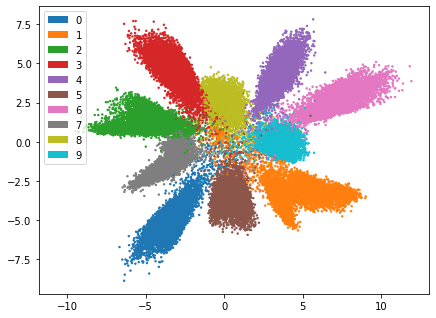

In [7]:
plot_embedding(transformed, pli.y_train)

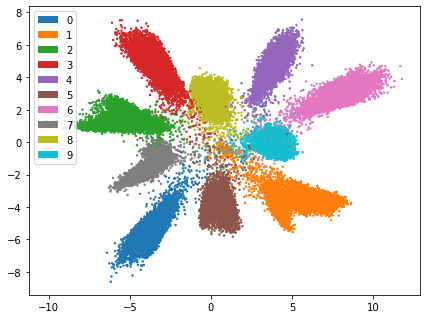

In [8]:
plot_embedding(pli.get_shifted_data(), pli.y_train)

In [12]:
for weight in [0.5,0.75,1]:
    meta_data["embedding_weight"] = weight
    print("\n+++ start of experiment with weight=%.2f +++"%weight)

    for j in range(1, 6): # perform same experiments with different initialisations
        meta_data["experiment_number"] += 1
        meta_data["base_path"] = "%s/Experiments/%s/Experiment-weights/Experiment-weight-%.2f--%02d"%(pathlib.Path().absolute(), meta_data["dataset"], meta_data["embedding_weight"], meta_data["experiment_number"])
        print("+++ start of iteration %s +++"%j)
        pli = Latent_Interventions(meta_data, verbose=1)
        pli()


+++ start of experiment with weight=0.50 +++
+++ start of iteration 1 +++
saved file to D:\CG\projective latent interventions\latent-projective-interventions/Experiments/mnist/Experiment-weights/Experiment-weight-0.50--01/meta_data.json
--fitting classifier basemodel--
Epoch 1/10
1200/1200 [==============================] - 22s 18ms/step - loss: 0.5404 - accuracy: 0.9008
Epoch 2/10
1200/1200 [==============================] - 22s 18ms/step - loss: 0.1043 - accuracy: 0.9685
Epoch 3/10
1200/1200 [==============================] - 22s 19ms/step - loss: 0.0706 - accuracy: 0.9782
Epoch 4/10
1200/1200 [==============================] - 22s 18ms/step - loss: 0.0609 - accuracy: 0.9812
Epoch 5/10
1200/1200 [==============================] - 22s 18ms/step - loss: 0.0500 - accuracy: 0.9848
Epoch 6/10
1200/1200 [==============================] - 23s 19ms/step - loss: 0.0415 - accuracy: 0.9869
Epoch 7/10
1200/1200 [==============================] - 22s 18ms/step - loss: 0.0378 - accuracy: 0.9887
E

Embeddings/pumap\umap\parametric_umap.py:270: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  warn(


Epoch 1/5
1333/1333 [==============================] - 14s 10ms/step - loss: 0.1500
Epoch 2/5
1333/1333 [==============================] - 15s 11ms/step - loss: 0.1304
Epoch 3/5
1333/1333 [==============================] - 14s 11ms/step - loss: 0.1249
Epoch 4/5
1333/1333 [==============================] - 13s 10ms/step - loss: 0.1215
Epoch 5/5
157/157 [==============================] - 0s 1ms/step
Tue Oct 20 12:28:23 2020 Finished embedding
D:\CG\projective latent interventions\latent-projective-interventions/Experiments/mnist/Experiment-weights/Experiment-weight-0.50--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:\CG\projective latent interventions\latent-projective-interventions/Experiments/mnist/Experiment-weights/Experiment-weight-0.50--01/embeddermodel\encoder_model.h5
Keras full model saved to D:\CG\projective latent interventions\latent-projective-interventions/Experiments/mnist/Experiment-weights/Experiment-weight-0.50--01/embeddermodel\parametric_model.h5
Tu

KeyboardInterrupt: 